## 1. Метод k ближайших соседей

In [40]:
import numpy as np
from sklearn import datasets, model_selection, neighbors, metrics
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

**Сгенерируем обучающую выборку** из описанных двумя признаками объектов 4 классов.

In [2]:
classification_problem = datasets.make_classification(
    n_samples=100, n_features=2, n_informative=2, 
    n_redundant=0, n_repeated=0, n_classes=3, 
    n_clusters_per_class=1
)

Визуализируем выборку.

In [3]:
colors = ListedColormap(['red', 'green', 'blue'])

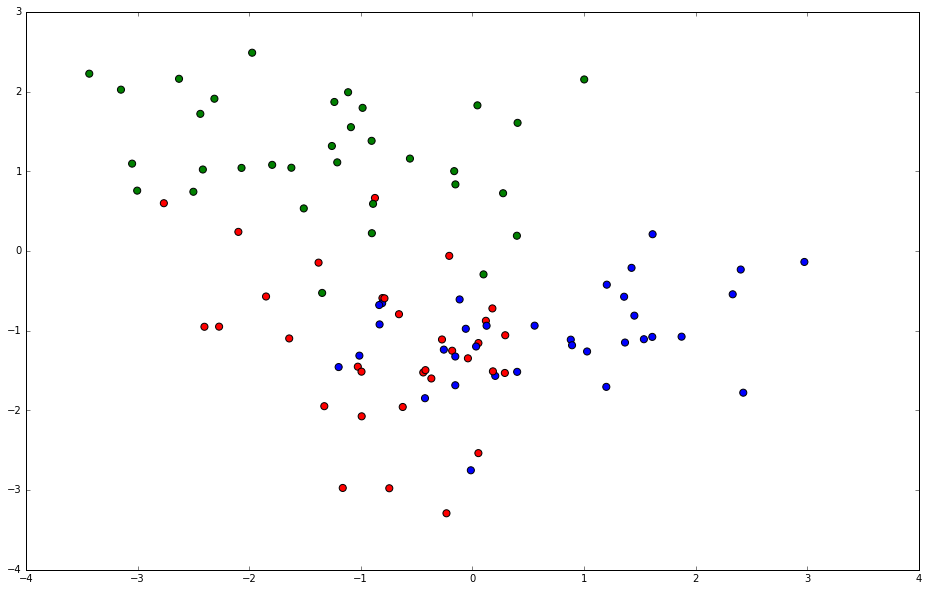

In [4]:
plt.figure(figsize=(16, 10))
plt.scatter(map(lambda x: x[0], classification_problem[0]), 
            map(lambda x: x[1], classification_problem[0]),
            s=50,
            c=classification_problem[1], 
            cmap=colors)
plt.show()

In [41]:
#or train_indices, test_indices in cross_validation.KFold(100, n_folds=5):
#   train_data = classification_problem[0][train_indices]
#   test_data = classification_problem[0][test_indices]
#   train_labels = classification_problem[1][train_indices]
#   test_labels = classification_problem[1][test_indices]

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(
    classification_problem[0], 
    classification_problem[1], 
    test_size = 0.3,
    random_state = 1
)

Решим задачу классификации методом **KNN** и применим **5-fold cross-validation**.

Построим **разделяющую поверхность** для разных $k$.

In [9]:
def get_meshgrid(data, step=.05, border=.5):
    x_min= data[:, 0].min() - border
    x_max =  data[:, 0].max() + border
    y_min = data[:, 1].min() - border
    y_max = data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), 
                       np.arange(y_min, y_max, step))

In [45]:
light_colors = ListedColormap(['lightcoral', 'lightgreen', 'lightblue'])

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          k_neighbors, colors=colors, light_colors=light_colors):
    estimator.fit(train_data, train_labels)
    
    if k_neighbors in range(1, 6) or k_neighbors % 10 == 0: #plot not every k
        plt.figure(figsize = (16, 6))
    
        # plot decision surface on the train data 
        plt.subplot(1, 2, 1)
        xx, yy = get_meshgrid(train_data)
        mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=50, cmap=colors)
        plt.title(('Train data, k = ' + str(k_neighbors) + ', accuracy = {:.2f}').format(
                np.mean(cross_val_score(estimator, train_data, train_labels, cv=5))))

        # plot decision surface on the test data
        plt.subplot(1, 2, 2)
        plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
        plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, s=50, cmap=colors)
        plt.title('Test data, k = ' + str(k_neighbors) + ', accuracy = {:.2f}'.format(
                np.mean(cross_val_score(estimator, test_data, test_labels, cv=5))))
    
    return np.mean(cross_val_score(estimator, test_data, test_labels, cv=5))

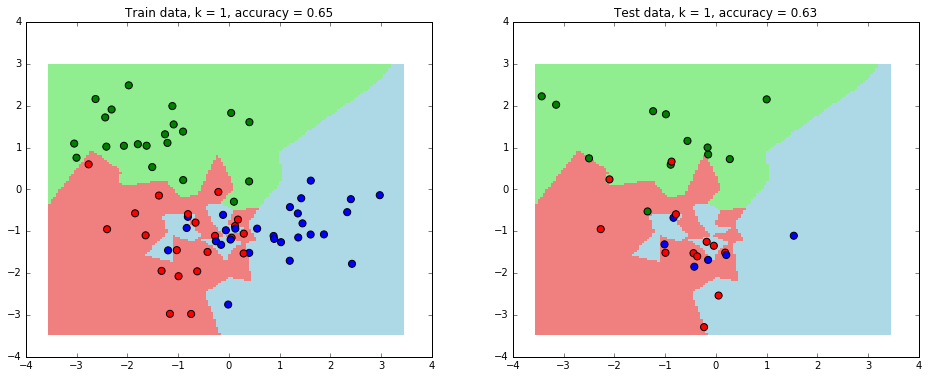

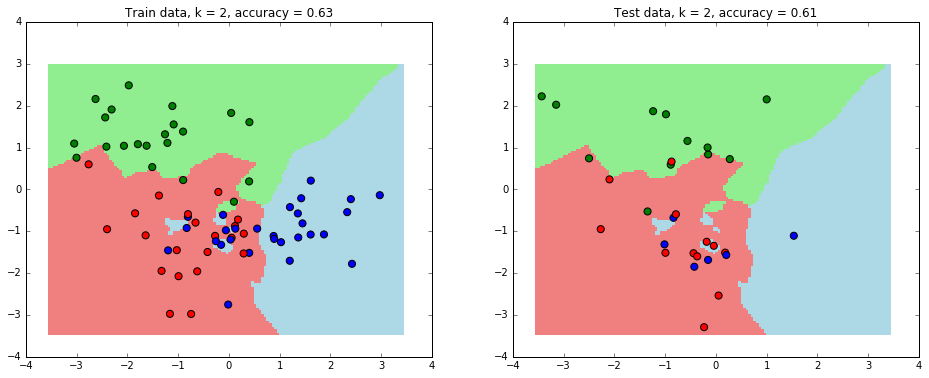

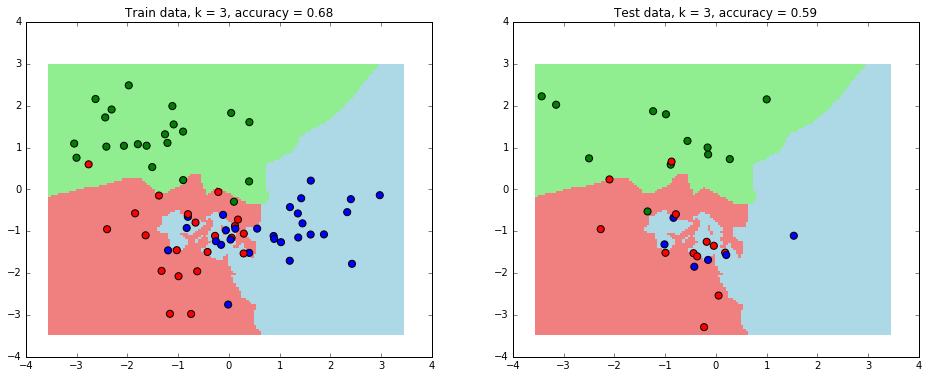

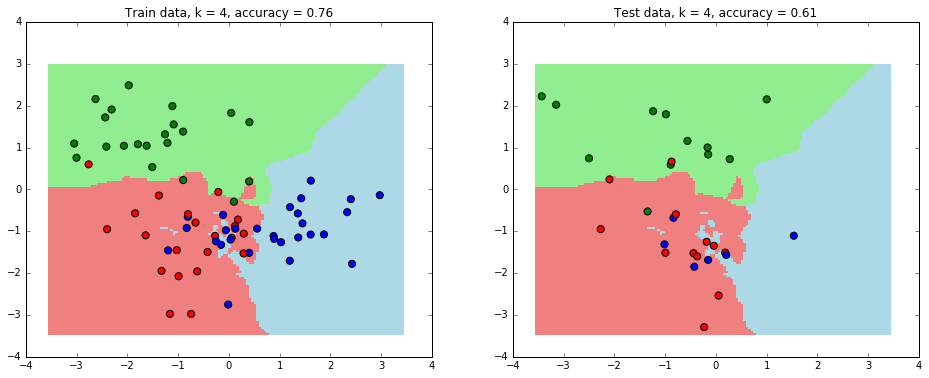

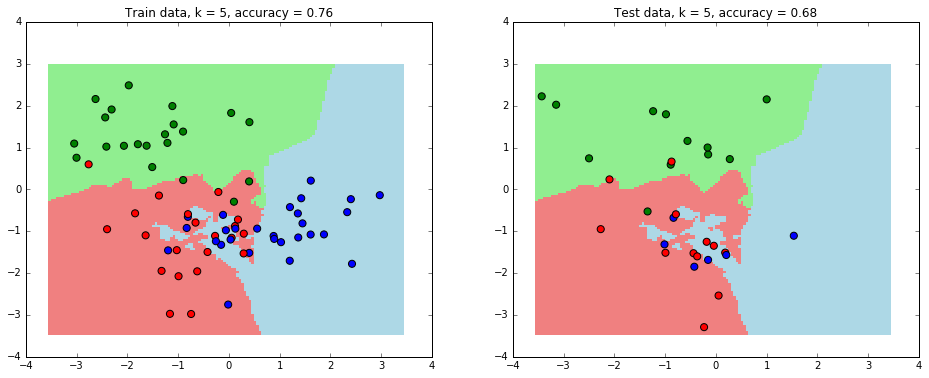

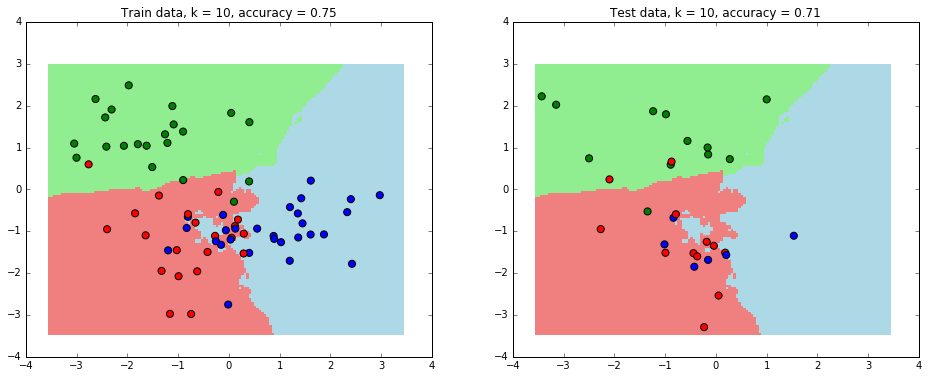

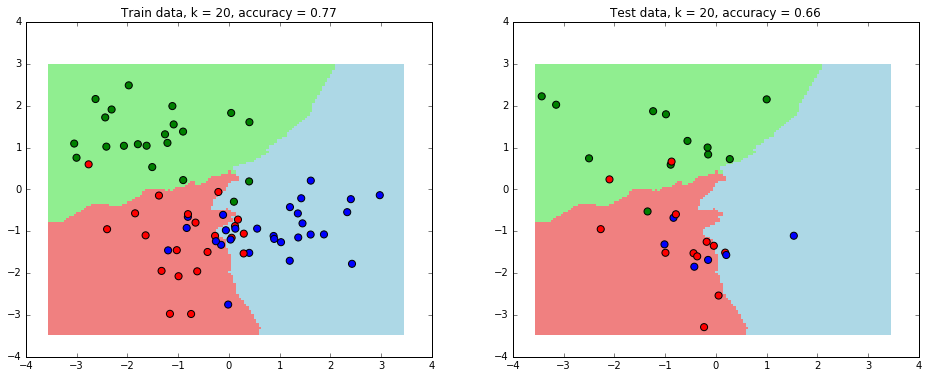

In [46]:
accuracy_values = []
k_values = []
for k_neighbors in range(1, 22, 1):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k_neighbors)
    accuracy_values.append(plot_decision_surface(
            estimator, train_data, train_labels, test_data, test_labels, k_neighbors))
    k_values.append(k_neighbors)

Теперь построим **график зависимости accuracy в кросс-валидации от $k$** и тем самым подберем оптимальное значение $k$.

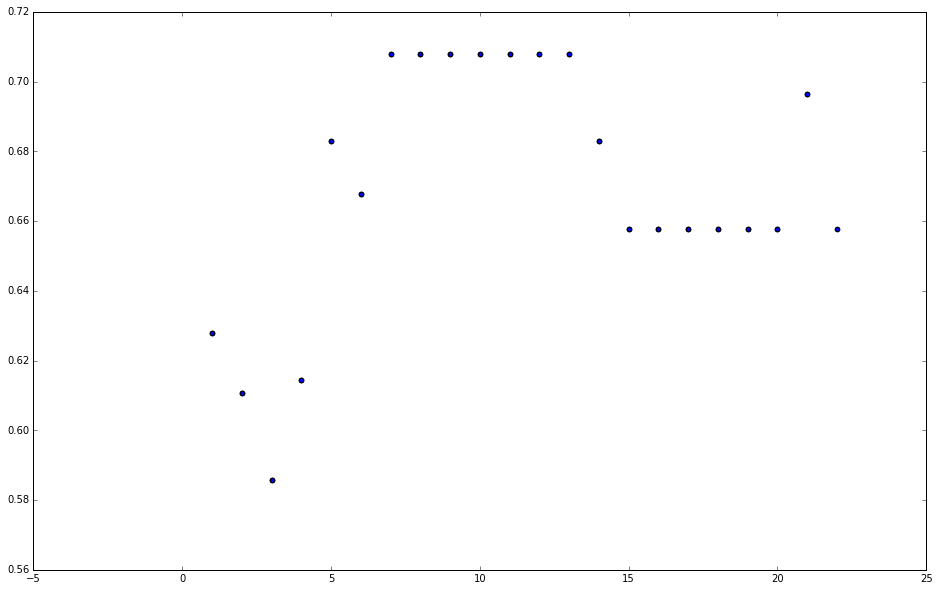

In [36]:
plt.figure(figsize=(16, 10))
plt.scatter(k_values, accuracy_values)
plt.show()

Таким образом, наиболее оптимальное $k$:

In [37]:
print(np.argmax(accuracy_values) + 1) # because k starts from 1

7
